# 2.0  Integer Programming


In [ ]:
#Download OR Tools
!pip install ortools

In [ ]:
from ortools.linear_solver import pywraplp

def IPModel():
    # Create the mip solver with the SCIP backend.
    solver = pywraplp.Solver.CreateSolver("SAT")
    if not solver:
        return

    infinity = solver.infinity()
    # x and y are integer non-negative variables.
    x = solver.IntVar(0.0, infinity, "x")
    y = solver.IntVar(0.0, infinity, "y")

    print("Number of variables =", solver.NumVariables())

    # x + 7 * y <= 17.5.
    solver.Add(x + 7 * y <= 17.5)

    # x <= 3.5.
    solver.Add(x <= 3.5)

    print("Number of constraints =", solver.NumConstraints())

    # Maximize x + 10 * y.
    solver.Maximize(x + 10 * y)

    print(f"Solving with {solver.SolverVersion()}")
    status = solver.Solve()

    if status == pywraplp.Solver.OPTIMAL:
        print("Solution:")
        print("Objective value =", solver.Objective().Value())
        print("x =", x.solution_value())
        print("y =", y.solution_value())
    else:
        print("The problem does not have an optimal solution.")

    print("\nAdvanced usage:")
    print("Problem solved in %f milliseconds" % solver.wall_time())
    print("Problem solved in %d iterations" % solver.iterations())
    print("Problem solved in %d branch-and-bound nodes" % solver.nodes())


IPModel()



Number of variables = 2
Number of constraints = 2
Solving with CP-SAT solver v9.7.2996
Solution:
Objective value = 23.0
x = 3.0
y = 2.0

Advanced usage:
Problem solved in 12.000000 milliseconds
Problem solved in 0 iterations
Problem solved in 0 branch-and-bound nodes


## Visualisation

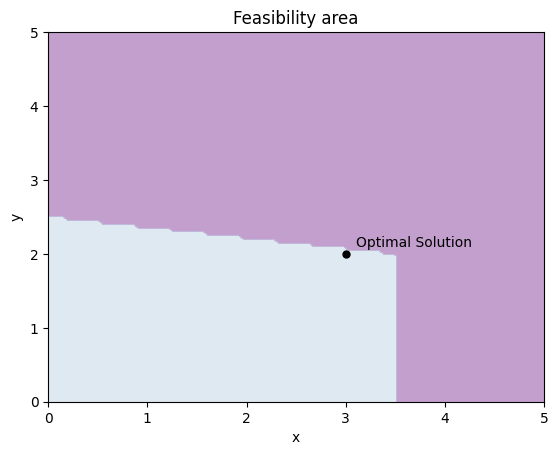

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the constraints of the feasibility area
constraints = [
    'x + 7*y <= 17.5',
    'x <= 3.5',
    'x >= 0',
    'y >= 0'
]

# Create a meshgrid of points in the region of interest
x = np.linspace(0, 5, 100)
y = np.linspace(0, 5, 100)
X, Y = np.meshgrid(x, y)

# Evaluate the constraints at each point in the meshgrid
feasible = np.ones((len(X), len(Y)), dtype=bool)
for constraint in constraints:
    feasible = np.logical_and(feasible, eval(constraint, {'x': X, 'y': Y}))

# Plot the points in the meshgrid that satisfy all of the constraints
plt.contourf(X, Y, feasible, cmap='BuPu_r', alpha=0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Feasibility area')

#Plot the optimal solution
point = np.array([3, 2])

# Plot the point using the matplotlib.pyplot.plot() function
plt.plot(point[0], point[1], 'ko', markersize=5)

# Add a text annotation to the graph
plt.annotate('Optimal Solution', point, xytext=(point[0] + 0.1, point[1] + 0.1))

plt.show()

# Using Arrays to Define a Model

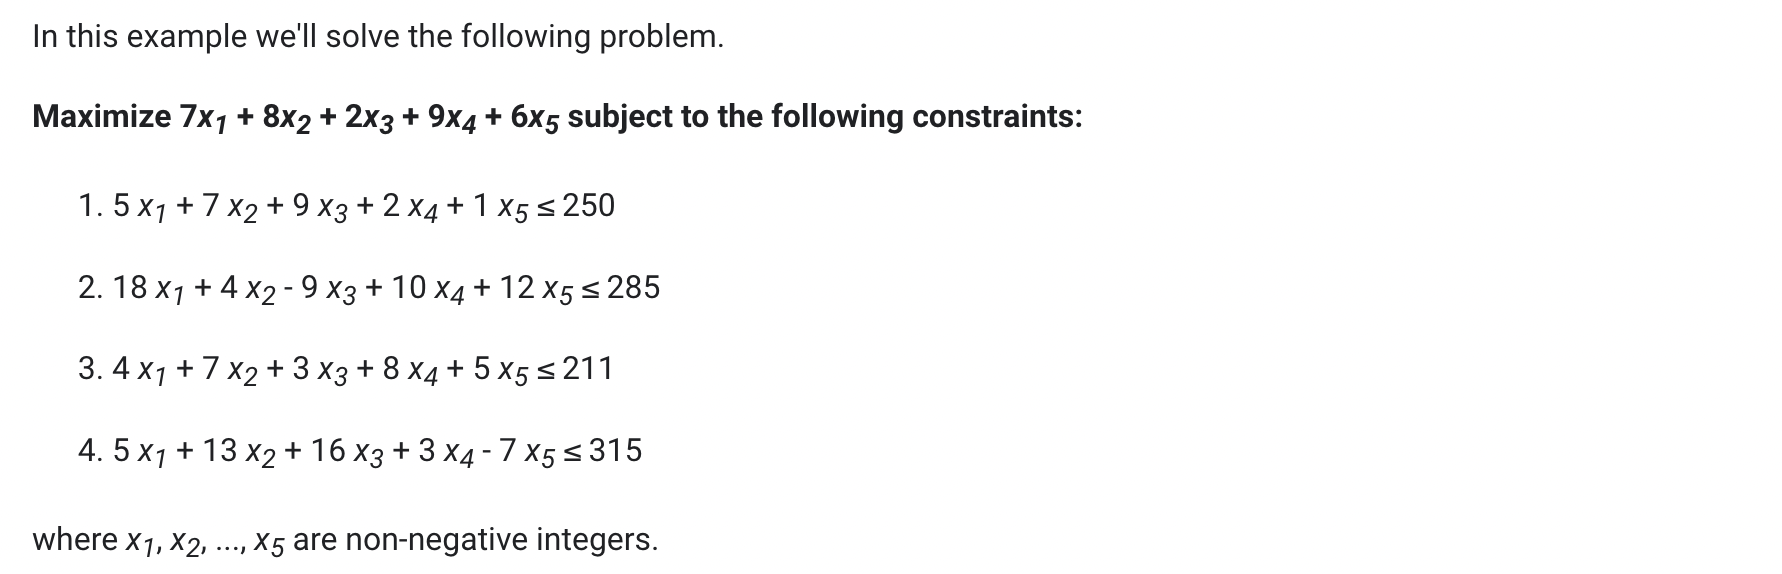

The following code creates arrays containing the data for the example: the variable coefficients for the constraints and objective function, and bounds for the constraints.



In [ ]:
def create_data_model():
    """Stores the data for the problem."""
    data = {}
    data["constraint_coeffs"] = [
        [5, 7, 9, 2, 1],
        [18, 4, -9, 10, 12],
        [4, 7, 3, 8, 5],
        [5, 13, 16, 3, -7],
    ]
    data["bounds"] = [250, 285, 211, 315]
    data["obj_coeffs"] = [7, 8, 2, 9, 6]
    data["num_vars"] = 5
    data["num_constraints"] = 4
    return data

data = create_data_model()

The following code instantiates the solver.

In [ ]:
# Create the mip solver with the SCIP backend.
solver = pywraplp.Solver.CreateSolver("SCIP")

Now, we will define the variables

In [ ]:
infinity = solver.infinity()
x = {}
for j in range(data["num_vars"]):
    x[j] = solver.IntVar(0, infinity, "x[%i]" % j)
print("Number of variables =", solver.NumVariables())

Number of variables = 5


Now, we will define constraints

In [ ]:
for i in range(data["num_constraints"]):
    constraint = solver.RowConstraint(0, data["bounds"][i], "")
    for j in range(data["num_vars"]):
        constraint.SetCoefficient(x[j], data["constraint_coeffs"][i][j])
print("Number of constraints =", solver.NumConstraints())
# You can also set the constraints as follows.
# for i in range(data['num_constraints']):
#  constraint_expr = \
# [data['constraint_coeffs'][i][j] * x[j] for j in range(data['num_vars'])]
#  solver.Add(sum(constraint_expr) <= data['bounds'][i])

Number of constraints = 4


We will then define the objective function

In [ ]:
objective = solver.Objective()
for j in range(data["num_vars"]):
    objective.SetCoefficient(x[j], data["obj_coeffs"][j])
objective.SetMaximization()
# You can also set the objective as follows.
# obj_expr = [data['obj_coeffs'][j] * x[j] for j in range(data['num_vars'])]
# solver.Maximize(solver.Sum(obj_expr))

Now, we will call the solver

In [ ]:
if solver:
  status = solver.Solve()

if status == pywraplp.Solver.OPTIMAL:
    print("Objective value =", solver.Objective().Value())
    for j in range(data["num_vars"]):
        print(x[j].name(), " = ", x[j].solution_value())
    print()
    print("Problem solved in %f milliseconds" % solver.wall_time())
    print("Problem solved in %d iterations" % solver.iterations())
    print("Problem solved in %d branch-and-bound nodes" % solver.nodes())
else:
    print("The problem does not have an optimal solution.")


Objective value = 259.99999999999966
x[0]  =  8.0
x[1]  =  21.0
x[2]  =  0.0
x[3]  =  2.0
x[4]  =  3.0

Problem solved in 174.000000 milliseconds
Problem solved in 71 iterations
Problem solved in 7 branch-and-bound nodes


# References

*   https://colab.research.google.com/github/google/or-tools/blob/stable/examples/notebook/linear_solver/simple_mip_program.ipynb#scrollTo=code



